<div class="alert alert-block alert-success">
    <h1 align="center">Plant Classification</h1>
    <h3 align="center">A2NDL POLIMI</h3>

</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive') # mount google drive to /content directory

Mounted at /content/drive


In [2]:
import os, datetime
import warnings
import numpy as np
import logging
import random
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
tf.keras.callbacks
from sklearn.metrics import mean_squared_error
from keras import callbacks
from keras import layers
from keras import models
from keras.layers import Dropout
import keras
from keras import optimizers
%load_ext tensorboard

### 11-Callbacks

In [3]:
def Checkpoint(address):

  # CheckPoint callback ---> to save wieghts
  checkpoint_path = address # The path to save wights of the model after training
  My_ModelCheckpoint_callback =callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                          monitor='val_accuracy',
                                          verbose=1,
                                          save_weights_only=False,
                                          save_best_only=True,
                                          mode='max',
                                          save_freq ='epoch')
  return My_ModelCheckpoint_callback

In [4]:
def earlystopping():

  # EarlyStopping callback --> Stop learning if it does not see any imporvement.
  My_EarlyStopping_callback = callbacks.EarlyStopping(monitor="val_accuracy",
                                                  min_delta=.02,
                                                  patience=25,
                                                  verbose=1,
                                                  mode="max",
                                                  restore_best_weights=True)
  return My_EarlyStopping_callback

### 12-Plot accuracy

In [5]:
def plot_accuracy(history, title="Accurcay"):

  # Create a figure for loss visualization
  plt.figure(figsize=(21, 4))

  # Plot training and validation loss
  plt.plot(history['accuracy'], label='Training accurcay', alpha=.2, color='#17becf')
  plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8, color='#15becf')
  plt.title(title)
  plt.legend()
  plt.grid(alpha=.3)
  plt.show()


In [6]:
import pickle

with open('/content/drive/MyDrive/dataset.pkl', 'rb') as file:
    data_loaded = pickle.load(file)

x_train = data_loaded["x_train"]
x_val = data_loaded["x_val"]
x_test = data_loaded["x_test"]
y_train = data_loaded["y_train"]
y_val = data_loaded["y_val"]
y_test = data_loaded["y_test"]

###13-Set parameters

In [7]:
# Define the input shape for the neural network, excluding the batch size
input_shape = x_train.shape[1:]
print('input_shape',input_shape)
# Define the batch size for training
batch_size = 64
# Define the number of training epochs
epochs = 100

history_dict ={} # to save history of different models

input_shape (96, 96, 3)


### 14-Simple_CNN

In [8]:
# Create model
def simple_cnn(input_shape=input_shape):

  '''Simple CNN netowrk'''
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape= input_shape))



  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Conv2D(128, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))
  return model

In [9]:
# Compile model
simple_cnn = simple_cnn()
simple_cnn.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.Precision(), keras.metrics.Recall(),'accuracy'],)

In [10]:
simple_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 1036800)           0         
                                                                 
 dense (Dense)               (None, 10)                10368010  
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 10461280 (39.91 MB)
Trainable params: 1046

In [15]:
print(x_train.shape)
print(x_val.shape)
print(y_test.shape)
print(x_test.shape)
print(y_val.shape)
print(y_train.shape)

(3120, 96, 96, 3)
(1040, 96, 96, 3)
(1040,)
(1040, 96, 96, 3)
(1040,)
(3120,)


In [11]:
# Fit model
simple_cnn_history = simple_cnn.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = 40
).history

Epoch 1/40


ValueError: ignored

In [ ]:
plot_accuracy(history = simple_cnn_history, title='simple_cnn_accuracy')

In [ ]:
! mkdir /content/results

In [ ]:
simple_cnn.save("/contet/results/simple_cnn")

In [ ]:
history_dict['simple_cnn'] = simple_cnn_history

### 15-simple_cnn_plus_maxpooling

In [ ]:
def simple_cnn_plus_maxpooling(input_shape=input_shape):

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape= input_shape))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))

  return model

In [ ]:
simple_cnn_plus_maxpooling = simple_cnn_plus_maxpooling()
simple_cnn_plus_maxpooling.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.Precision(), keras.metrics.Recall(),'accuracy'],)

In [ ]:
simple_cnn_plus_maxpooling.summary()

In [ ]:
simple_cnn_plus_maxpooling_history = simple_cnn_plus_maxpooling.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = 40
).history

In [ ]:
plot_accuracy(history = simple_cnn_plus_maxpooling_history, title='simple_cnn_plus_maxpooling_accuracy')

In [ ]:
simple_cnn_plus_maxpooling.save("/contet/results/simple_cnn_plus_maxpooling")

In [ ]:
history_dict['simple_cnn_plus_maxpooling'] = simple_cnn_plus_maxpooling_history

### 16-simple_cnn_plus_maxpooling_es
use earlystopping

In [ ]:
def simple_cnn_plus_maxpooling_es(input_shape=input_shape):

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape= input_shape))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))

  return model

In [ ]:
simple_cnn_plus_maxpooling_es = simple_cnn_plus_maxpooling_es()
simple_cnn_plus_maxpooling_es.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.Precision(), keras.metrics.Recall(),'accuracy'],)

In [ ]:
My_all_callbacks = [earlystopping()]

In [ ]:
simple_cnn_plus_maxpooling_history_es = simple_cnn_plus_maxpooling_es.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=My_all_callbacks
).history

In [ ]:
plot_accuracy(history = simple_cnn_plus_maxpooling_history_es, title='simple_cnn_plus_maxpooling_accuracy_es')

In [ ]:
simple_cnn_plus_maxpooling_es.save("/contet/results/simple_cnn_plus_maxpooling_es")

In [ ]:
history_dict['simple_cnn_plus_maxpooling_es'] = simple_cnn_plus_maxpooling_history_es

### 17-simple_cnn_plus_maxpooling_es_da
using data augumentation

In [ ]:
def simple_cnn_plus_maxpooling_es_da(input_shape=input_shape):

  preprocessing = tf.keras.Sequential([
        tfkl.RandomBrightness(0.2, value_range=(0,1)),
        tfkl.RandomTranslation(0.2,0.2),

    ], name='preprocessing')

  input_layer = tfkl.Input(shape=input_shape, name='Input')
  preprocessing = preprocessing(input_layer)


  x = tfkl.Conv2D(filters=32, kernel_size=3, name='conv0')(preprocessing)
  x = tfkl.ReLU(name='relu0')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp0')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Conv2D(filters=64, kernel_size=3, name='conv1')(x)
  x = tfkl.ReLU(name='relu1')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp1')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Conv2D(filters=128, kernel_size=3, name='conv2')(x)
  x = tfkl.ReLU(name='relu2')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp2')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Conv2D(filters=128, kernel_size=3, name='conv3')(x)
  x = tfkl.ReLU(name='relu3')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp3')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Flatten()(x)
  dense = tfkl.Dense(units=512, activation='relu',name='dense')(x)
  output_layer = tfkl.Dense(units=2, activation='Softmax',name='outpu_layer')(dense)

   # Connect input and output through the Model class
  model = tfk.Model(inputs=input_layer, outputs=output_layer, name='CNN')

  return model

In [ ]:
simple_cnn_plus_maxpooling_es_da = simple_cnn_plus_maxpooling_es_da()
simple_cnn_plus_maxpooling_es_da.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.Precision(), keras.metrics.Recall(),'accuracy'],)

In [ ]:
My_all_callbacks = [earlystopping(),Checkpoint(address='/content/checkpoint/simple_cnn_plus_maxpooling_es_da')]

In [ ]:
simple_cnn_plus_maxpooling_history_es_da = simple_cnn_plus_maxpooling_es_da.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=My_all_callbacks
).history

In [ ]:
plot_accuracy(history = simple_cnn_plus_maxpooling_history_es_da, title='simple_cnn_plus_maxpooling_accuracy_es_da')

In [ ]:
history_dict['simple_cnn_plus_maxpooling_es_da'] = simple_cnn_plus_maxpooling_history_es_da

# Effect of removing outliers on models

### 19-Effect of outliers on simple_cnn_plus_maxpooling_es_da

In [ ]:
# Firstly, we split dataset to training_data and test part. We keep x_test, y_test till the end for evaluating the model
x_training_data, x_test, y_training_data, y_test = train_test_split(
    cleaned_x,
    cleaned_y,
    test_size = 0.1,
    shuffle =True,
    random_state=seed,
    stratify=cleaned_y)# I used stratified since our data is imbalanced

In [ ]:
# Secondly, We split training data into train and validation parts. Training part
# for training and validation part to validate model.
x_train, x_val, y_train, y_val = train_test_split(
    x_training_data,
    y_training_data,
    test_size = len(x_test), # Ensure validation set size matches test set size--> Why??
    random_state=seed,
    shuffle =True,
    stratify=y_training_data)

In [ ]:
# Print the shapes of different datsets after splitting the main dataset into training, validation, testing parts
print('x_train.shape:',x_train.shape,'y_train.shape:', y_train.shape)
print('x_val.shape:',x_val.shape, 'y_val.shape:',y_val.shape)
print('x_test.shape:',x_test.shape,'y_test.shape', y_test.shape)

x_train.shape: (4002, 96, 96, 3) y_train.shape: (4002, 2)
x_val.shape: (501, 96, 96, 3) y_val.shape: (501, 2)
x_test.shape: (501, 96, 96, 3) y_test.shape (501, 2)


In [ ]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [ ]:
def simple_cnn_plus_maxpooling_es_da_out(input_shape=input_shape):

  preprocessing = tf.keras.Sequential([
        tfkl.RandomBrightness(0.2, value_range=(0,1)),
        tfkl.RandomTranslation(0.2,0.2),

    ], name='preprocessing')

  input_layer = tfkl.Input(shape=input_shape, name='Input')
  preprocessing = preprocessing(input_layer)


  x = tfkl.Conv2D(filters=32, kernel_size=3, name='conv0')(preprocessing)
  x = tfkl.ReLU(name='relu0')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp0')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Conv2D(filters=64, kernel_size=3, name='conv1')(x)
  x = tfkl.ReLU(name='relu1')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp1')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Conv2D(filters=128, kernel_size=3, name='conv2')(x)
  x = tfkl.ReLU(name='relu2')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp2')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Conv2D(filters=128, kernel_size=3, name='conv3')(x)
  x = tfkl.ReLU(name='relu3')(x)
  x = tfkl.MaxPooling2D((2,2),name='mp3')(x)
  x = tfkl.Dropout(0.25)(x)

  x = tfkl.Flatten()(x)
  dense = tfkl.Dense(units=512, activation='relu',name='dense')(x)
  output_layer = tfkl.Dense(units=2, activation='Softmax',name='outpu_layer')(dense)

   # Connect input and output through the Model class
  model = tfk.Model(inputs=input_layer, outputs=output_layer, name='CNN')

  return model

In [ ]:
simple_cnn_plus_maxpooling_es_da_out = simple_cnn_plus_maxpooling_es_da_out()


In [ ]:
simple_cnn_plus_maxpooling_es_da_out.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[keras.metrics.Precision(), keras.metrics.Recall(),'accuracy'],)

In [ ]:
My_all_callbacks = [earlystopping(),Checkpoint(address='/content/checkpoint/simple_cnn_plus_maxpooling_es_da_out')]

In [ ]:
simple_cnn_plus_maxpooling_history_es_da_out = simple_cnn_plus_maxpooling_es_da_out.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=My_all_callbacks
).history

Epoch 1/100
61/63 [============================>.] - ETA: 0s - loss: 0.6903 - precision_5: 0.6022 - recall_5: 0.6022 - accuracy: 0.6022
Epoch 1: val_accuracy improved from -inf to 0.62076, saving model to /content/checkpoint/simple_cnn_plus_maxpooling_es_da_out
63/63 [==============================] - 7s 67ms/step - loss: 0.6886 - precision_5: 0.6042 - recall_5: 0.6042 - accuracy: 0.6042 - val_loss: 0.6635 - val_precision_5: 0.6208 - val_recall_5: 0.6208 - val_accuracy: 0.6208
Epoch 2/100
61/63 [============================>.] - ETA: 0s - loss: 0.6625 - precision_5: 0.6304 - recall_5: 0.6304 - accuracy: 0.6304
Epoch 2: val_accuracy improved from 0.62076 to 0.69860, saving model to /content/checkpoint/simple_cnn_plus_maxpooling_es_da_out
63/63 [==============================] - 4s 59ms/step - loss: 0.6624 - precision_5: 0.6304 - recall_5: 0.6304 - accuracy: 0.6304 - val_loss: 0.6377 - val_precision_5: 0.6986 - val_recall_5: 0.6986 - val_accuracy: 0.6986
Epoch 3/100
63/63 [==============

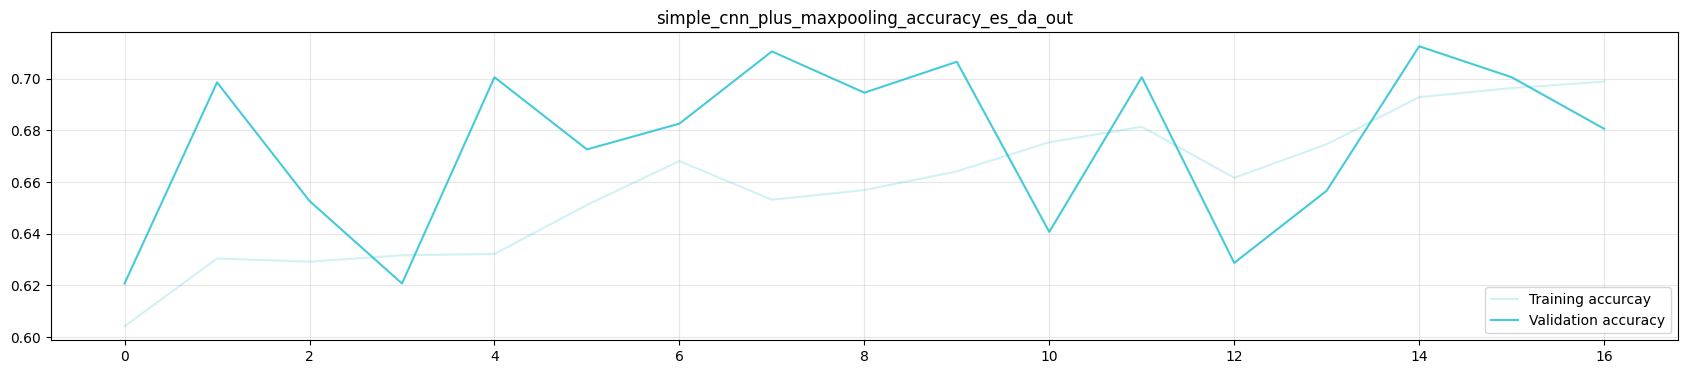

In [ ]:
plot_accuracy(history = simple_cnn_plus_maxpooling_history_es_da_out, title='simple_cnn_plus_maxpooling_accuracy_es_da_out')

In [ ]:
history_dict['simple_cnn_plus_maxpooling_es_da_out'] = simple_cnn_plus_maxpooling_history_es_da_out

In [ ]:
!cp /content/checkpoint /content/drive/MyDrive

### 20-Transfer Learning

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input


In [ ]:
# Create MobileNetV2 model with specified settings
mobile = tfk.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights=None,
    pooling='avg',
)


In [ ]:
# Create an input layer with shape (96, 96, 3)
inputs = tfk.Input(shape=input_shape)
# Connect MobileNetV2 to the input
x = mobile(inputs)
# Add a Dense layer with 2 units and softmax activation as the classifier
outputs = tfkl.Dense(2, activation='softmax')(x)

# Create a Model connecting input and output
model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with Categorical Cross-Entropy loss and Adam optimizer
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])


In [ ]:
# Train the model
tf = model.fit(
    x = preprocess_input(x_train*255), # We need to apply the preprocessing thought for the MobileNetV2 network
    y = y_train,
    batch_size = 16,
    epochs = 200,
    validation_data = (preprocess_input(x_val*255), y_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=25, restore_best_weights=True)]
).history

Epoch 1/200
251/251 [==============================] - 16s 65ms/step - loss: 0.6310 - accuracy: 0.6534 - val_loss: 0.6640 - val_accuracy: 0.6208
Epoch 2/200
251/251 [==============================] - 13s 51ms/step - loss: 0.5818 - accuracy: 0.7014 - val_loss: 0.6640 - val_accuracy: 0.6208
Epoch 3/200
251/251 [==============================] - 10s 38ms/step - loss: 0.5460 - accuracy: 0.7351 - val_loss: 0.6736 - val_accuracy: 0.6208
Epoch 4/200
251/251 [==============================] - 12s 46ms/step - loss: 0.5291 - accuracy: 0.7409 - val_loss: 0.6637 - val_accuracy: 0.6208
Epoch 5/200
251/251 [==============================] - 9s 34ms/step - loss: 0.5029 - accuracy: 0.7696 - val_loss: 0.6638 - val_accuracy: 0.6208
Epoch 6/200
251/251 [==============================] - 9s 34ms/step - loss: 0.4652 - accuracy: 0.7811 - val_loss: 0.6752 - val_accuracy: 0.6208
Epoch 7/200
251/251 [==============================] - 9s 37ms/step - loss: 0.4712 - accuracy: 0.7809 - val_loss: 0.6740 - val_accur

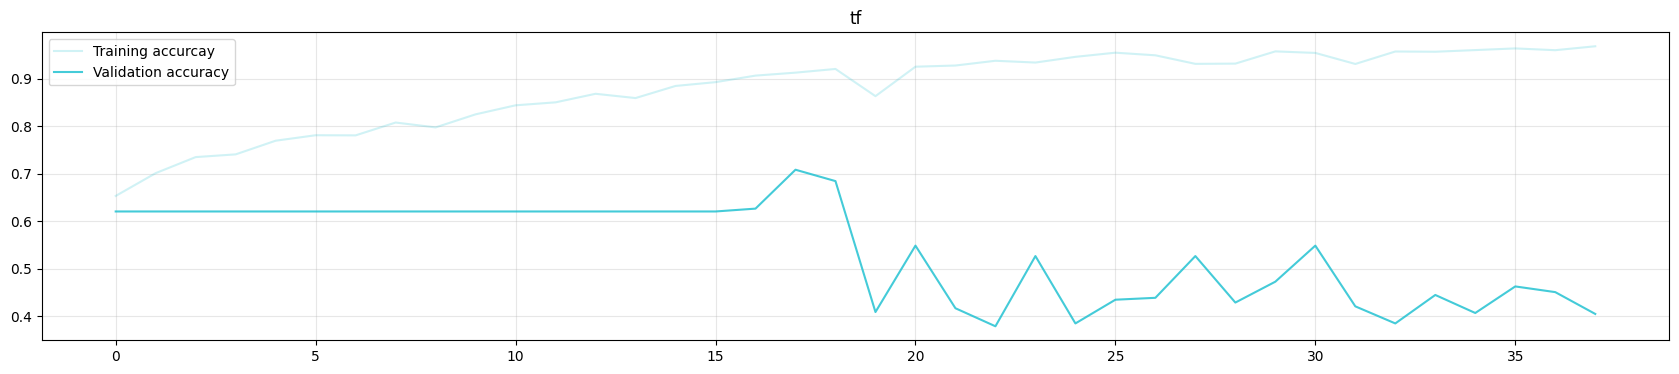

In [ ]:
plot_accuracy(history = tf, title='tf')

In [ ]:
history_dict['tf'] = tf

In [ ]:
tf_imagenet = tfk.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet",
    pooling='avg',
)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Use the supernet as feature extractor, i.e. freeze all its weigths
mobile.trainable = False

# Create an input layer with shape (96, 96, 3)
inputs = tfk.Input(shape=(96, 96, 3))
# Connect MobileNetV2 to the input
x = mobile(inputs)
# Add a Dense layer with 2 units and softmax activation as the classifier
outputs = tfkl.Dense(2, activation='softmax')(x)

# Create a Model connecting input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with Categorical Cross-Entropy loss and Adam optimizer
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

#

In [ ]:
# Train the model
tf_imagene_history = tl_model.fit(
    x = preprocess_input(x_train*255), # We need to apply the preprocessing thought for the MobileNetV2 network
    y = y_train,
    batch_size = 16,
    epochs = 200,
    validation_data = (preprocess_input(x_val*255), y_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=25, restore_best_weights=True)]
).history

Epoch 1/200
251/251 [==============================] - 7s 17ms/step - loss: 0.3747 - accuracy: 0.8158 - val_loss: 0.6422 - val_accuracy: 0.7126
Epoch 2/200
251/251 [==============================] - 4s 15ms/step - loss: 0.3474 - accuracy: 0.8398 - val_loss: 0.6443 - val_accuracy: 0.7146
Epoch 3/200
251/251 [==============================] - 3s 13ms/step - loss: 0.3467 - accuracy: 0.8406 - val_loss: 0.6525 - val_accuracy: 0.7166
Epoch 4/200
251/251 [==============================] - 3s 11ms/step - loss: 0.3456 - accuracy: 0.8391 - val_loss: 0.6715 - val_accuracy: 0.7146
Epoch 5/200
251/251 [==============================] - 3s 11ms/step - loss: 0.3452 - accuracy: 0.8418 - val_loss: 0.6283 - val_accuracy: 0.7146
Epoch 6/200
251/251 [==============================] - 5s 18ms/step - loss: 0.3449 - accuracy: 0.8433 - val_loss: 0.6337 - val_accuracy: 0.7146
Epoch 7/200
251/251 [==============================] - 3s 13ms/step - loss: 0.3438 - accuracy: 0.8411 - val_loss: 0.6423 - val_accuracy:

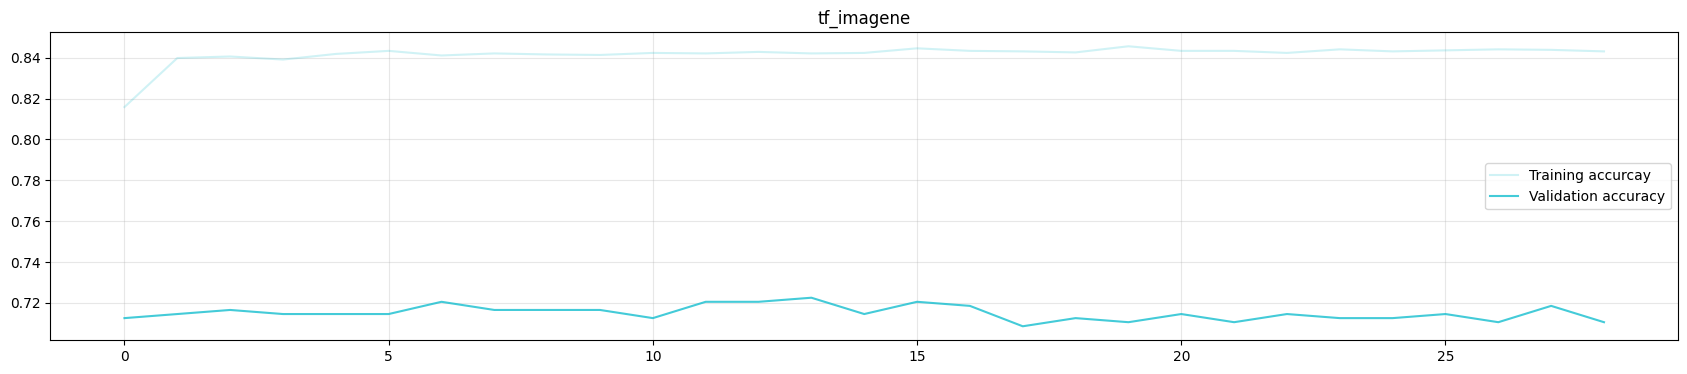

In [ ]:
plot_accuracy(history = tf_imagene_history, title='tf_imagene')

In [ ]:
history_dict['tf_imagene_history'] = tf_imagene_history

###21-Comparison

In [ ]:
max_val_accuracy = {}
for model in history_dict.keys():
  max = np.max(history_dict[model]['val_accuracy'])
  max_val_accuracy[model] = max

In [ ]:
max_val_accuracy

{'simple_cnn': 0.7115384340286255,
 'simple_cnn_plus_maxpooling': 0.7711538672447205,
 'simple_cnn_plus_maxpooling_es': 0.7615384459495544,
 'simple_cnn_plus_maxpooling_es_da': 0.824999988079071,
 'simple_cnn_plus_maxpooling_es_da_out': 0.71257483959198,
 'tf': 0.7085828185081482,
 'tf_imagene_history': 0.7225548624992371}

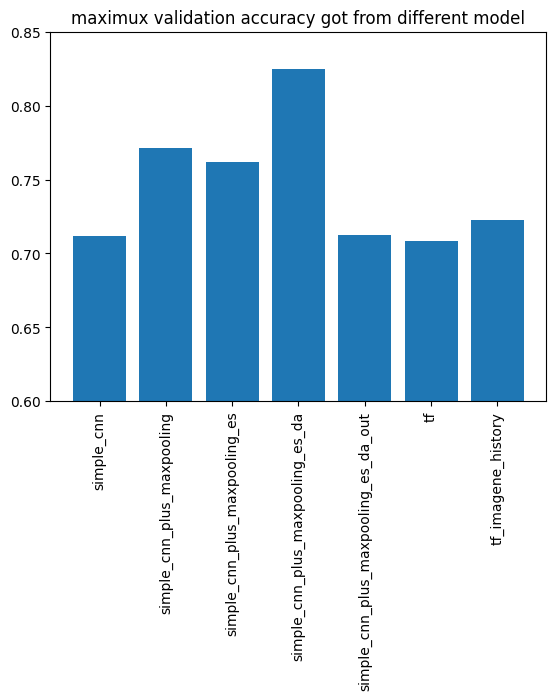

In [ ]:
plt.bar(x=max_val_accuracy.keys(), height=max_val_accuracy.values())
plt.ylim(0.6,0.85)
plt.xticks(rotation=90)
plt.title('Maximux validation accuracy got from different model')
plt.show()

In [ ]:
mean_val_accuracy = {}
for model in history_dict.keys():
  mean = np.mean(history_dict[model]['val_accuracy'])
  mean_val_accuracy[model] = mean

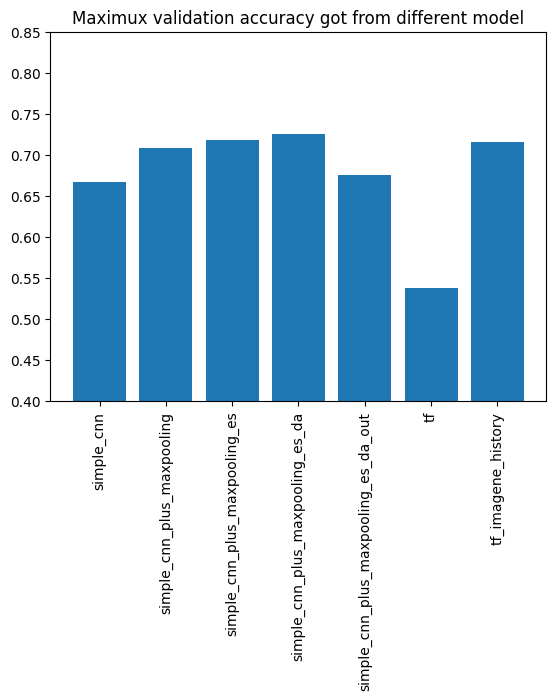

In [ ]:
plt.bar(x=mean_val_accuracy.keys(), height=mean_val_accuracy.values())
plt.ylim(0.4,0.85)
plt.xticks(rotation=90)
plt.title('Mean validation accuracy got from different model')
plt.show()

In [ ]:
np.mean(tf['val_accuracy'])

0.5381342564758501